In [77]:
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [103]:
filename = '/Users/kaanguney.keklikci/Desktop/Erasmus+/Heidelberg/data/ThoraricSurgery.csv'
df = pd.read_csv(filename)
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [104]:
df.drop('id',axis=1,inplace=True)

In [105]:
df.dtypes

DGN         object
PRE4       float64
PRE5       float64
PRE6        object
PRE7        object
PRE8        object
PRE9        object
PRE10       object
PRE11       object
PRE14       object
PRE17       object
PRE19       object
PRE25       object
PRE30       object
PRE32       object
AGE          int64
Risk1Yr     object
dtype: object

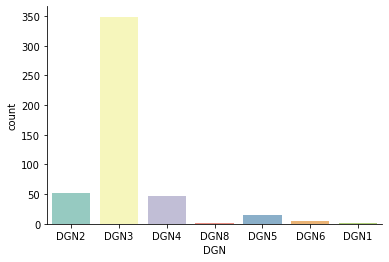

In [106]:
sns.countplot(df.DGN,palette='Set3')
sns.despine()

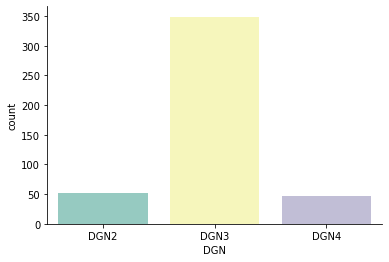

In [107]:
dgn_types = ['DGN1','DGN8', 'DGN5', 'DGN6']
df = df[~df.DGN.isin(dgn_types)]

sns.countplot(df.DGN,palette='Set3')
sns.despine()

In [108]:
X, y = df.drop('Risk1Yr',axis=1), df.Risk1Yr

### Define the encoder

In [109]:
ordinal_encoder = OrdinalEncoder()

ordinal_encoder

OrdinalEncoder()

### Training, validation split

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X, 
                                                 y,
                                                 test_size=.33,
                                                 random_state=42,
                                                 shuffle=True,
                                                 stratify=y)

### Encode data

In [111]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [112]:
X_train.dtypes

DGN       object
PRE4     float64
PRE5     float64
PRE6      object
PRE7      object
PRE8      object
PRE9      object
PRE10     object
PRE11     object
PRE14     object
PRE17     object
PRE19     object
PRE25     object
PRE30     object
PRE32     object
AGE        int64
dtype: object

In [115]:
# encode training 
X_train = pd.DataFrame(ordinal_encoder.fit_transform(X_train), columns=X_train.columns)
X_train.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,1.0,66.0,59.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,29.0
1,1.0,95.0,86.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,24.0
2,1.0,64.0,47.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.0
3,0.0,41.0,34.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,19.0
4,1.0,94.0,83.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,39.0


In [116]:
# encode testing 
X_test = pd.DataFrame(ordinal_encoder.fit_transform(X_test), columns=X_test.columns)
X_test.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,1.0,66.0,65.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0
1,0.0,43.0,42.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8.0
2,1.0,74.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,1.0,17.0,17.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0
4,2.0,76.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0


In [117]:
X_test.dtypes

DGN      float64
PRE4     float64
PRE5     float64
PRE6     float64
PRE7     float64
PRE8     float64
PRE9     float64
PRE10    float64
PRE11    float64
PRE14    float64
PRE17    float64
PRE19    float64
PRE25    float64
PRE30    float64
PRE32    float64
AGE      float64
dtype: object

### Standardize data

In [118]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [119]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [120]:
X_train.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,0.027613,0.601799,0.549365,0.377562,-0.252646,2.513379,-0.288154,0.644278,-0.463222,0.432204,-0.274352,-0.081923,-0.130189,0.473804,-0.081923,0.533867
1,0.027613,1.675779,1.589536,0.377562,-0.252646,-0.397871,-0.288154,0.644278,-0.463222,0.432204,-0.274352,-0.081923,-0.130189,0.473804,-0.081923,-0.049382
2,0.027613,0.527732,0.087066,0.377562,-0.252646,-0.397871,-0.288154,0.644278,-0.463222,0.432204,-0.274352,-0.081923,-0.130189,-2.110579,-0.081923,-0.632630
3,-2.043373,-0.324046,-0.413757,-1.542244,-0.252646,-0.397871,-0.288154,0.644278,-0.463222,0.432204,-0.274352,-0.081923,-0.130189,0.473804,-0.081923,-0.632630
4,0.027613,1.638746,1.473962,0.377562,-0.252646,-0.397871,-0.288154,0.644278,-0.463222,0.432204,-0.274352,-0.081923,-0.130189,0.473804,-0.081923,1.700363


In [121]:
X_test.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,0.027613,0.601799,0.780514,0.377562,-0.252646,-0.397871,-0.288154,0.644278,-0.463222,0.432204,-0.274352,-0.081923,-0.130189,0.473804,-0.081923,0.417217
1,-2.043373,-0.249978,-0.105558,0.377562,-0.252646,2.513379,-0.288154,0.644278,-0.463222,0.432204,-0.274352,-0.081923,-0.130189,0.473804,-0.081923,-1.915777
2,0.027613,0.898070,0.934613,-1.542244,-0.252646,-0.397871,-0.288154,-1.552125,-0.463222,-1.041219,-0.274352,-0.081923,-0.130189,0.473804,-0.081923,-2.499025
3,0.027613,-1.212857,-1.068680,2.297368,-0.252646,2.513379,-0.288154,0.644278,2.158791,-1.041219,-0.274352,-0.081923,-0.130189,0.473804,-0.081923,-0.282681
4,2.098599,0.972137,1.204288,0.377562,-0.252646,-0.397871,-0.288154,-1.552125,-0.463222,-1.041219,-0.274352,-0.081923,-0.130189,0.473804,-0.081923,-2.149076


In [122]:
# end of preprocessing